In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Power Data and Cleanup


In [2]:
power_df = pd.read_csv("electricity_data_clean.csv")
power_df

,Date,Time,Generation,Demand,Loadshed,Gas,Liquid Fuel,Coal,Hydro,Solar,Wind,India_Bheramara,India_Tripura,India_Adani,Nepal,Remarks,date_time,Year,Month
0,30-12-2019,00:00:00,6226.0,6226.0,0.0,5659,17,222,47,0.0,NaN,211,78,NaN,NaN,NaN,2019-12-30 00:00:00,2019,12
1,30-12-2019,19:30:00,8589.0,8589.0,0.0,6451,1359,280,45,0.0,NaN,436,106,NaN,NaN,NaN,2019-12-30 19:30:00,2019,12
2,30-12-2019,20:00:00,8419.0,8419.0,0.0,6337,1306,280,46,0.0,NaN,436,102,NaN,NaN,NaN,2019-12-30 20:00:00,2019,12
3,30-12-2019,21:00:00,8080.0,8080.0,0.0,6460,847,280,45,0.0,NaN,436,100,NaN,NaN,NaN,2019-12-30 21:00:00,2019,12
4,30-12-2019,22:00:00,7497.0,7497.0,0.0,6257,569,280,46,0.0,NaN,436,94,NaN,NaN,NaN,2019-12-30 22:00:00,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36664,05-01-2024,02:00:00,7215.0,7215.0,0.0,4124,0,2491,86,0.0,8.0,430,76,NaN,NaN,NaN,2024-01-05 02:00:00,2024,1
36665,05-01-2024,03:00:00,6871.0,6871.0,0.0,3880,0,2393,86,0.0,9.0,435,68,NaN,NaN,NaN,2024-01-05 03:00:00,2024,1
36666,05-01-2024,04:00:00,6686.0,6686.0,0.0,3667,0,2409,86,0.0,10.0,444,70,NaN,NaN,NaN,2024-01-05 04:00:00,2024,1
36667,05-01-2024,05:00:00,6576.0,6576.0,0.0,3575,0,2403,86,0.0,7.0,435,70,NaN,NaN,NaN,2024-01-05 05:00:00,2024,1


In [3]:
power_df["date_time"] = pd.to_datetime(power_df["date_time"])
# power_df.drop(columns=['Date', 'Time'], inplace=True)

# EDA


<Axes: xlabel='Demand', ylabel='Density'>

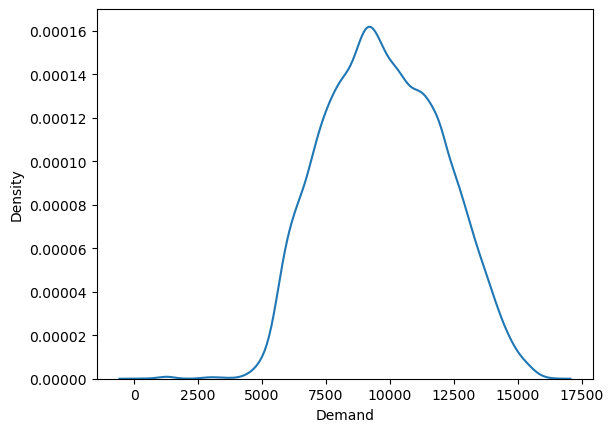

In [4]:
sns.kdeplot(power_df["Demand"])

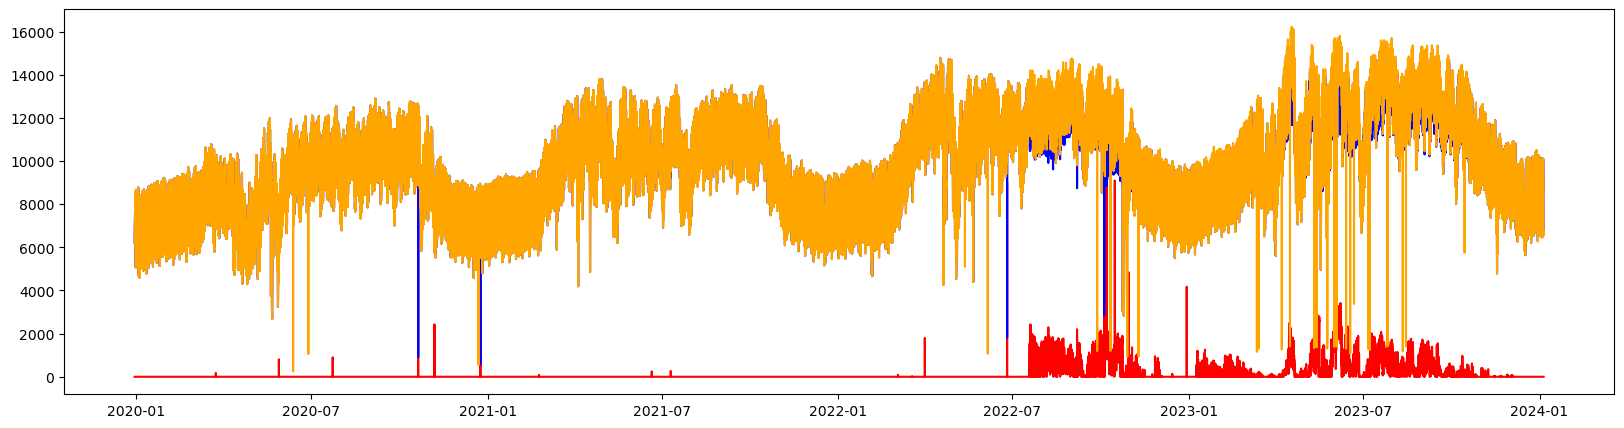

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(power_df["date_time"], power_df["Loadshed"], color="red")
plt.plot(power_df["date_time"], power_df["Generation"], color="blue")
plt.plot(power_df["date_time"], power_df["Demand"], color="orange")

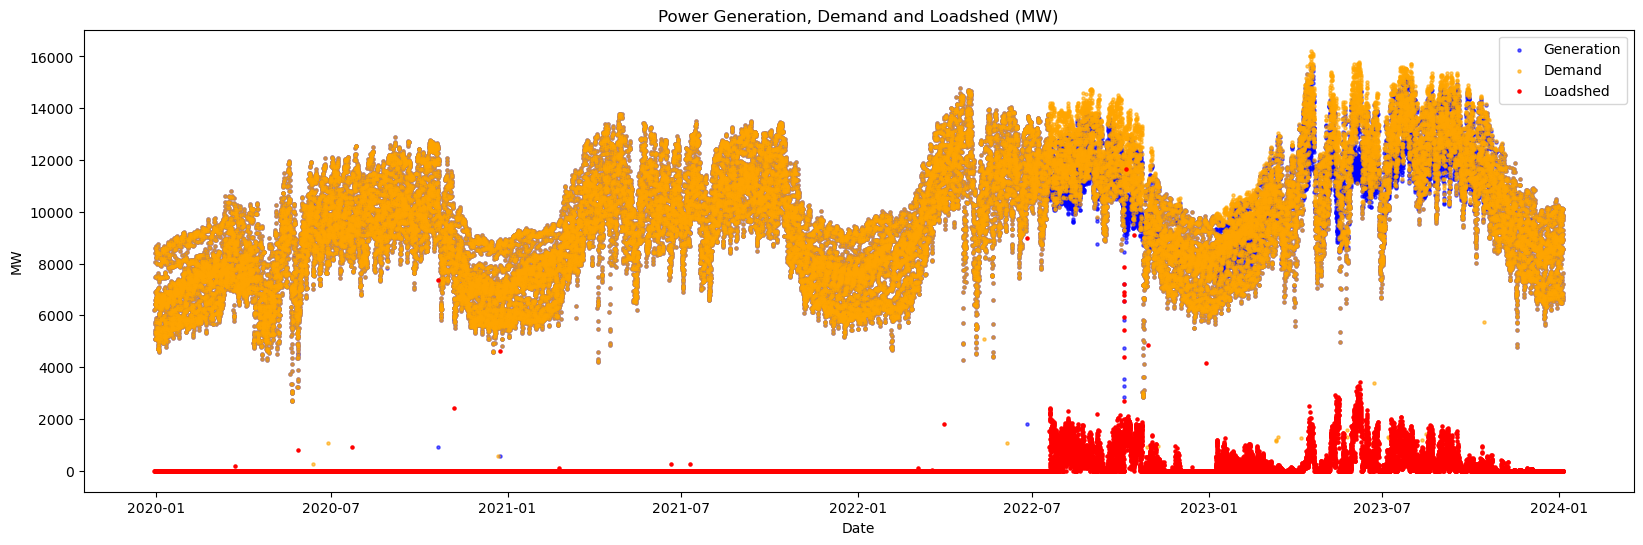

In [6]:
plt.figure(figsize=(20, 6))
plt.scatter(
    power_df["date_time"],
    power_df["Generation"],
    s=5,
    color="blue",
    alpha=0.6,
    label="Generation",
)
plt.scatter(
    power_df["date_time"],
    power_df["Demand"],
    s=5,
    color="orange",
    alpha=0.6,
    label="Demand",
)
plt.scatter(
    power_df["date_time"], power_df["Loadshed"], s=5, color="red", label="Loadshed"
)
plt.title("Power Generation, Demand and Loadshed (MW)")
plt.xlabel("Date")
plt.ylabel("MW")
plt.legend()

# Load Weather Data


In [7]:
weather_df = pd.read_csv("BD_weather.csv")
weather_df

,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature
0,Ambaganctg,2008,1,1,0.0,9.1,78.0,20.1
1,Ambaganctg,2008,1,2,0.0,5.6,79.0,21.0
2,Ambaganctg,2008,1,3,0.0,8.6,82.0,20.1
3,Ambaganctg,2008,1,4,0.0,9.1,73.0,21.0
4,Ambaganctg,2008,1,5,0.0,9.4,67.0,20.3
...,...,...,...,...,...,...,...,...
543834,Teknaf,2023,12,27,0.0,9.1,77.0,22.2
543835,Teknaf,2023,12,28,0.0,9.2,82.0,22.3
543836,Teknaf,2023,12,29,0.0,10.0,75.0,24.0
543837,Teknaf,2023,12,30,0.0,9.2,68.0,20.1


In [8]:
# weather_df = weather_df.drop(columns="Sunshine")

In [9]:
weather_df["Date"] = pd.to_datetime(weather_df[["Year", "Month", "Day"]])
weather_df

,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature,Date
0,Ambaganctg,2008,1,1,0.0,9.1,78.0,20.1,2008-01-01
1,Ambaganctg,2008,1,2,0.0,5.6,79.0,21.0,2008-01-02
2,Ambaganctg,2008,1,3,0.0,8.6,82.0,20.1,2008-01-03
3,Ambaganctg,2008,1,4,0.0,9.1,73.0,21.0,2008-01-04
4,Ambaganctg,2008,1,5,0.0,9.4,67.0,20.3,2008-01-05
...,...,...,...,...,...,...,...,...,...
543834,Teknaf,2023,12,27,0.0,9.1,77.0,22.2,2023-12-27
543835,Teknaf,2023,12,28,0.0,9.2,82.0,22.3,2023-12-28
543836,Teknaf,2023,12,29,0.0,10.0,75.0,24.0,2023-12-29
543837,Teknaf,2023,12,30,0.0,9.2,68.0,20.1,2023-12-30


In [10]:
weather_df["Station"].unique()

array(['Ambaganctg', 'Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong', 'Chuadanga', 'Comilla', 'Coxsbazar', 'Dhaka',
       'Dinajpur', 'Faridpur', 'Feni', 'Hatiya', 'Ishurdi', 'Jessore',
       'Khepupara', 'Khulna', 'Kutubdia', 'Madaripur', 'Mcourt', 'Mongla',
       'Mymensingh', 'Patuakhali', 'Rajshahi', 'Rangamati', 'Rangpur',
       'Sandwip', 'Satkhira', 'Sitakunda', 'Srimangal', 'Sydpur',
       'Sylhet', 'Tangail', 'Teknaf'], dtype=object)

In [11]:
stations = [
    "Dhaka",
    "Chittagong",
    "Patuakhali",
    # 'Rangamati',
    # 'Bogra',
]
weather_df = weather_df[weather_df["Station"].isin(stations)]

In [12]:
weather_df

,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature,Date
82544,Chittagong,1961,1,1,0.0,0.7,76.0,22.2,1961-01-01
82545,Chittagong,1961,1,2,0.0,4.9,72.0,23.7,1961-01-02
82546,Chittagong,1961,1,3,0.0,0.5,85.0,22.3,1961-01-03
82547,Chittagong,1961,1,4,0.0,8.3,81.0,23.1,1961-01-04
82548,Chittagong,1961,1,5,0.0,9.5,53.0,20.9,1961-01-05
...,...,...,...,...,...,...,...,...,...
375823,Patuakhali,2023,12,27,0.0,3.7,90.0,20.5,2023-12-27
375824,Patuakhali,2023,12,28,0.0,0.0,90.0,20.4,2023-12-28
375825,Patuakhali,2023,12,29,0.0,7.8,85.0,20.9,2023-12-29
375826,Patuakhali,2023,12,30,0.0,6.7,89.0,20.6,2023-12-30


In [13]:
daily_weather_df = (
    weather_df.groupby("Date")
    .agg(
        {
            "Rainfall": "mean",
            "Sunshine": "mean",
            "Humidity": "mean",
            "Temperature": ["mean", "max", "min"],
        }
    )
    .reset_index()
)
daily_weather_df.columns = [
    "Date",
    "Rainfall",
    "Sunshine",
    "Humidity",
    "Temp_mean",
    "Temp_max",
    "Temp_min",
]
daily_weather_df

,Date,Rainfall,Sunshine,Humidity,Temp_mean,Temp_max,Temp_min
0,1961-01-01,0.25,0.550000,78.000000,21.850000,22.2,21.5
1,1961-01-02,0.50,5.400000,74.000000,22.950000,23.7,22.2
2,1961-01-03,0.00,2.350000,80.000000,22.700000,23.1,22.3
3,1961-01-04,0.00,7.550000,77.500000,21.450000,23.1,19.8
4,1961-01-05,0.00,9.750000,60.500000,18.750000,20.9,16.6
...,...,...,...,...,...,...,...
23005,2023-12-27,0.00,2.733333,83.000000,21.533333,22.3,20.5
23006,2023-12-28,0.00,2.400000,82.000000,21.266667,21.8,20.4
23007,2023-12-29,0.00,6.433333,79.000000,21.466667,21.8,20.9
23008,2023-12-30,0.00,4.433333,76.666667,22.166667,23.1,20.6


In [15]:
power_df["Date"] = pd.to_datetime(power_df["Date"], dayfirst=False)
daily_power_df = (
    power_df[["Generation", "Demand", "Loadshed"]]
    .groupby(power_df["Date"])
    .sum()
    .reset_index()
)

In [16]:
full_df = pd.merge(daily_power_df, daily_weather_df, on="Date")
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,Temp_mean,Temp_max,Temp_min
0,2019-12-30,45731.0,45731.0,0.0,0.000000,6.866667,78.666667,19.166667,20.4,18.2
1,2019-12-31,166149.5,166149.0,0.0,0.000000,7.833333,77.000000,18.233333,21.0,14.0
2,2020-01-01,159347.4,159348.0,0.0,0.000000,5.833333,74.333333,21.033333,22.8,20.1
3,2020-01-02,174597.1,174596.0,0.0,0.000000,1.800000,83.666667,21.466667,21.7,21.0
4,2020-01-03,143162.5,142689.0,0.0,0.666667,0.700000,92.666667,18.666667,19.3,18.0
...,...,...,...,...,...,...,...,...,...,...
1458,2023-12-27,216600.0,216600.0,0.0,0.000000,2.733333,83.000000,21.533333,22.3,20.5
1459,2023-12-28,218455.0,218455.0,0.0,0.000000,2.400000,82.000000,21.266667,21.8,20.4
1460,2023-12-29,196972.0,196972.0,0.0,0.000000,6.433333,79.000000,21.466667,21.8,20.9
1461,2023-12-30,208563.0,208563.0,0.0,0.000000,4.433333,76.666667,22.166667,23.1,20.6


In [17]:
full_df["Year"] = full_df["Date"].dt.year
full_df["Month"] = full_df["Date"].dt.month

In [18]:
full_df = full_df.sort_values(by="Date")
full_df["loadshed_prev"] = full_df["Loadshed"].shift(1)
full_df["generation_prev"] = full_df["Generation"].shift(1)

In [19]:
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,Temp_mean,Temp_max,Temp_min,Year,Month,loadshed_prev,generation_prev
0,2019-12-30,45731.0,45731.0,0.0,0.000000,6.866667,78.666667,19.166667,20.4,18.2,2019,12,NaN,NaN
1,2019-12-31,166149.5,166149.0,0.0,0.000000,7.833333,77.000000,18.233333,21.0,14.0,2019,12,0.0,45731.0
2,2020-01-01,159347.4,159348.0,0.0,0.000000,5.833333,74.333333,21.033333,22.8,20.1,2020,1,0.0,166149.5
3,2020-01-02,174597.1,174596.0,0.0,0.000000,1.800000,83.666667,21.466667,21.7,21.0,2020,1,0.0,159347.4
4,2020-01-03,143162.5,142689.0,0.0,0.666667,0.700000,92.666667,18.666667,19.3,18.0,2020,1,0.0,174597.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2023-12-27,216600.0,216600.0,0.0,0.000000,2.733333,83.000000,21.533333,22.3,20.5,2023,12,0.0,212707.0
1459,2023-12-28,218455.0,218455.0,0.0,0.000000,2.400000,82.000000,21.266667,21.8,20.4,2023,12,0.0,216600.0
1460,2023-12-29,196972.0,196972.0,0.0,0.000000,6.433333,79.000000,21.466667,21.8,20.9,2023,12,0.0,218455.0
1461,2023-12-30,208563.0,208563.0,0.0,0.000000,4.433333,76.666667,22.166667,23.1,20.6,2023,12,0.0,196972.0


In [20]:
# full_df["Year_Month"] = full_df["Year"].astype(str) + "_" + full_df["Month"].astype(str)
# full_df["Year_Month"] = full_df["Year_Month"].astype("category")

**Convert Units to GW**


In [21]:
full_df[["Generation", "Demand", "Loadshed"]] = (
    full_df[["Generation", "Demand", "Loadshed"]] / 1000
)
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,Temp_mean,Temp_max,Temp_min,Year,Month,loadshed_prev,generation_prev
0,2019-12-30,45.7310,45.731,0.0,0.000000,6.866667,78.666667,19.166667,20.4,18.2,2019,12,NaN,NaN
1,2019-12-31,166.1495,166.149,0.0,0.000000,7.833333,77.000000,18.233333,21.0,14.0,2019,12,0.0,45731.0
2,2020-01-01,159.3474,159.348,0.0,0.000000,5.833333,74.333333,21.033333,22.8,20.1,2020,1,0.0,166149.5
3,2020-01-02,174.5971,174.596,0.0,0.000000,1.800000,83.666667,21.466667,21.7,21.0,2020,1,0.0,159347.4
4,2020-01-03,143.1625,142.689,0.0,0.666667,0.700000,92.666667,18.666667,19.3,18.0,2020,1,0.0,174597.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2023-12-27,216.6000,216.600,0.0,0.000000,2.733333,83.000000,21.533333,22.3,20.5,2023,12,0.0,212707.0
1459,2023-12-28,218.4550,218.455,0.0,0.000000,2.400000,82.000000,21.266667,21.8,20.4,2023,12,0.0,216600.0
1460,2023-12-29,196.9720,196.972,0.0,0.000000,6.433333,79.000000,21.466667,21.8,20.9,2023,12,0.0,218455.0
1461,2023-12-30,208.5630,208.563,0.0,0.000000,4.433333,76.666667,22.166667,23.1,20.6,2023,12,0.0,196972.0


# LGBM


In [22]:
# from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using Time-based split


## Cross-Validate Generation


In [23]:
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,Temp_mean,Temp_max,Temp_min,Year,Month,loadshed_prev,generation_prev
0,2019-12-30,45.7310,45.731,0.0,0.000000,6.866667,78.666667,19.166667,20.4,18.2,2019,12,NaN,NaN
1,2019-12-31,166.1495,166.149,0.0,0.000000,7.833333,77.000000,18.233333,21.0,14.0,2019,12,0.0,45731.0
2,2020-01-01,159.3474,159.348,0.0,0.000000,5.833333,74.333333,21.033333,22.8,20.1,2020,1,0.0,166149.5
3,2020-01-02,174.5971,174.596,0.0,0.000000,1.800000,83.666667,21.466667,21.7,21.0,2020,1,0.0,159347.4
4,2020-01-03,143.1625,142.689,0.0,0.666667,0.700000,92.666667,18.666667,19.3,18.0,2020,1,0.0,174597.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2023-12-27,216.6000,216.600,0.0,0.000000,2.733333,83.000000,21.533333,22.3,20.5,2023,12,0.0,212707.0
1459,2023-12-28,218.4550,218.455,0.0,0.000000,2.400000,82.000000,21.266667,21.8,20.4,2023,12,0.0,216600.0
1460,2023-12-29,196.9720,196.972,0.0,0.000000,6.433333,79.000000,21.466667,21.8,20.9,2023,12,0.0,218455.0
1461,2023-12-30,208.5630,208.563,0.0,0.000000,4.433333,76.666667,22.166667,23.1,20.6,2023,12,0.0,196972.0


In [24]:
target_col = "Generation"

In [27]:
train_df = full_df[full_df["Year"] == 2022]
valid_df = full_df[full_df["Year"] == 2023]
X_train = train_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y_train = train_df[target_col]
X_valid = valid_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y_valid = valid_df[target_col]

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [28]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_boost_round": 1000,
    "learning_rate": 1e-2,
    "num_leaves": 63,
    # 'max_depth': 2,
    "verbose": -1,
}

generation_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=500), lgb.log_evaluation(period=200)],
)

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 500 rounds
[200]	training's rmse: 13.1375	valid_1's rmse: 18.1179
[400]	training's rmse: 9.98412	valid_1's rmse: 17.5256
[600]	training's rmse: 8.61275	valid_1's rmse: 17.8931
[800]	training's rmse: 7.63605	valid_1's rmse: 18.2457
Early stopping, best iteration is:
[341]	training's rmse: 10.5571	valid_1's rmse: 17.393


In [29]:
valid_preds = generation_model.predict(X_valid)
print("RMSE ", np.sqrt(mean_squared_error(y_valid, valid_preds)))
print("MAE ", mean_absolute_error(y_valid, valid_preds))

RMSE  17.392962018279565
MAE  14.314642543332782


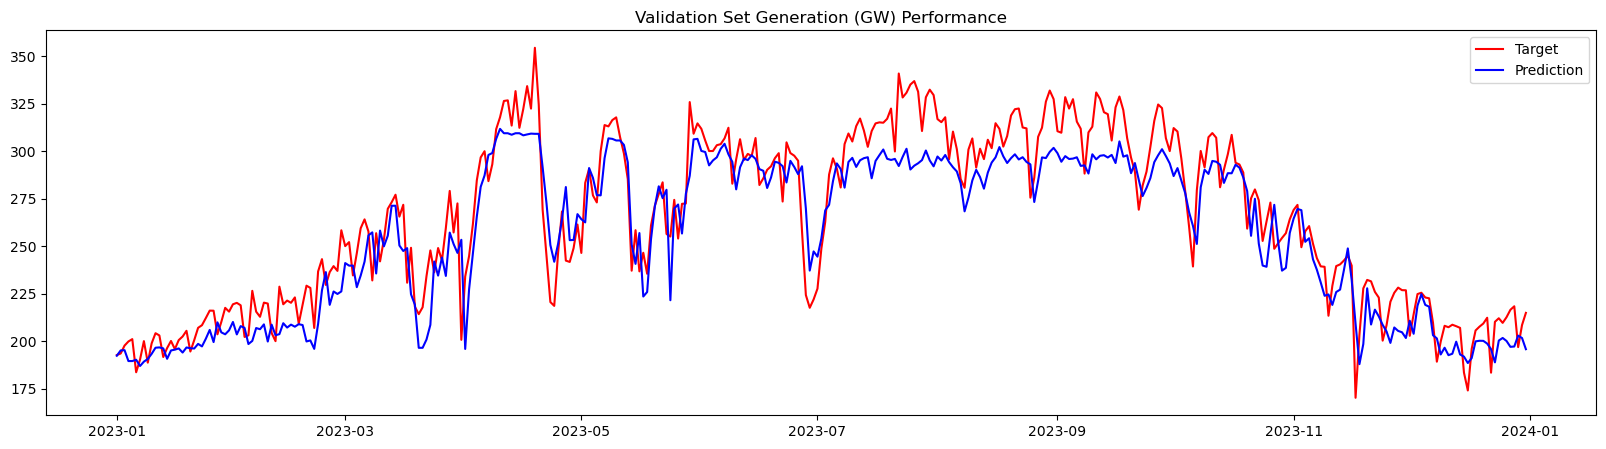

In [30]:
valid_df = full_df.loc[X_valid.index].copy()
valid_df = valid_df.sort_values(by="Date")
valid_df["Pred"] = generation_model.predict(valid_df[X_train.columns])
plt.figure(figsize=(20, 5))
plt.plot(valid_df["Date"], valid_df[target_col], color="red", label="Target")
plt.plot(valid_df["Date"], valid_df["Pred"], color="blue", label="Prediction")
plt.title("Validation Set Generation (GW) Performance")
plt.legend()
plt.show()

Comparing with full training set to ensure model is not overfitting


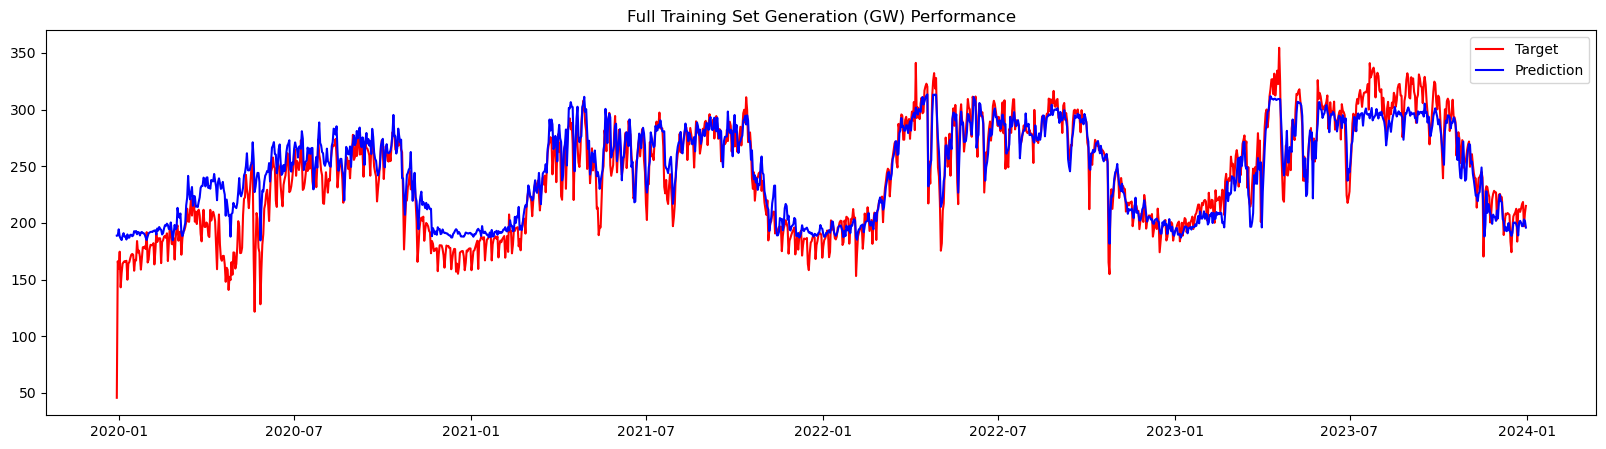

In [31]:
view_df = full_df.copy()
view_df["Pred"] = generation_model.predict(full_df[X_train.columns])
plt.figure(figsize=(20, 5))
plt.plot(view_df["Date"], view_df[target_col], color="red", label="Target")
plt.plot(view_df["Date"], view_df["Pred"], color="blue", label="Prediction")
plt.title("Full Training Set Generation (GW) Performance")
plt.legend()
plt.show()

## Final Model Training for Generation


In [34]:
X = full_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y = full_df["Generation"]
generation_data = lgb.Dataset(X, y)

In [35]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_boost_round": 500,
    "learning_rate": 1e-2,
    "num_leaves": 63,
    # 'max_depth': 2,
    "verbose": -1,
}

generation_model = lgb.train(
    params,
    generation_data,
    valid_sets=[generation_data],
    callbacks=[lgb.log_evaluation(period=100)],
)

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's rmse: 20.3202
[200]	training's rmse: 12.4601
[300]	training's rmse: 10.0372
[400]	training's rmse: 8.80373
[500]	training's rmse: 7.96563


In [36]:
generation_model.save_model("generation_lgbm_model.txt")

## Cross-Validate Loadshed


In [37]:
target_col = "Loadshed"

In [ ]:
train_df = full_df[full_df["Year"] == 2022]
valid_df = full_df[full_df["Year"] == 2023]
X_train = train_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y_train = train_df[target_col]
X_valid = valid_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y_valid = valid_df[target_col]

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [42]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_boost_round": 1000,
    "learning_rate": 1e-2,
    "num_leaves": 63,
    # 'max_depth': 2,
    "verbose": -1,
}

loadshed_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=500), lgb.log_evaluation(period=200)],
)

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 500 rounds
[200]	training's rmse: 4.68238	valid_1's rmse: 7.70597
[400]	training's rmse: 3.81521	valid_1's rmse: 7.6219
[600]	training's rmse: 3.34438	valid_1's rmse: 7.84908
[800]	training's rmse: 2.99884	valid_1's rmse: 7.96436
Early stopping, best iteration is:
[312]	training's rmse: 4.13818	valid_1's rmse: 7.54085


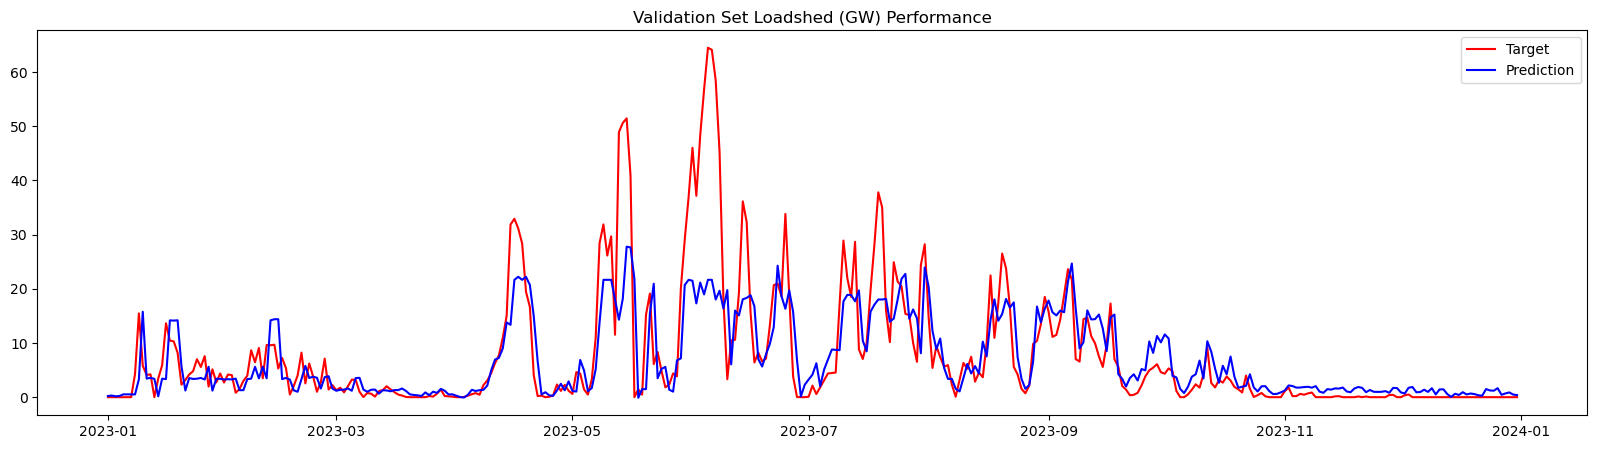

In [43]:
valid_df = full_df.loc[X_valid.index].copy()
valid_df = valid_df.sort_values(by="Date")
valid_df["Pred"] = loadshed_model.predict(valid_df[X_train.columns])
plt.figure(figsize=(20, 5))
plt.plot(valid_df["Date"], valid_df[target_col], color="red", label="Target")
plt.plot(valid_df["Date"], valid_df["Pred"], color="blue", label="Prediction")
plt.title("Validation Set Loadshed (GW) Performance")
plt.legend()
plt.show()

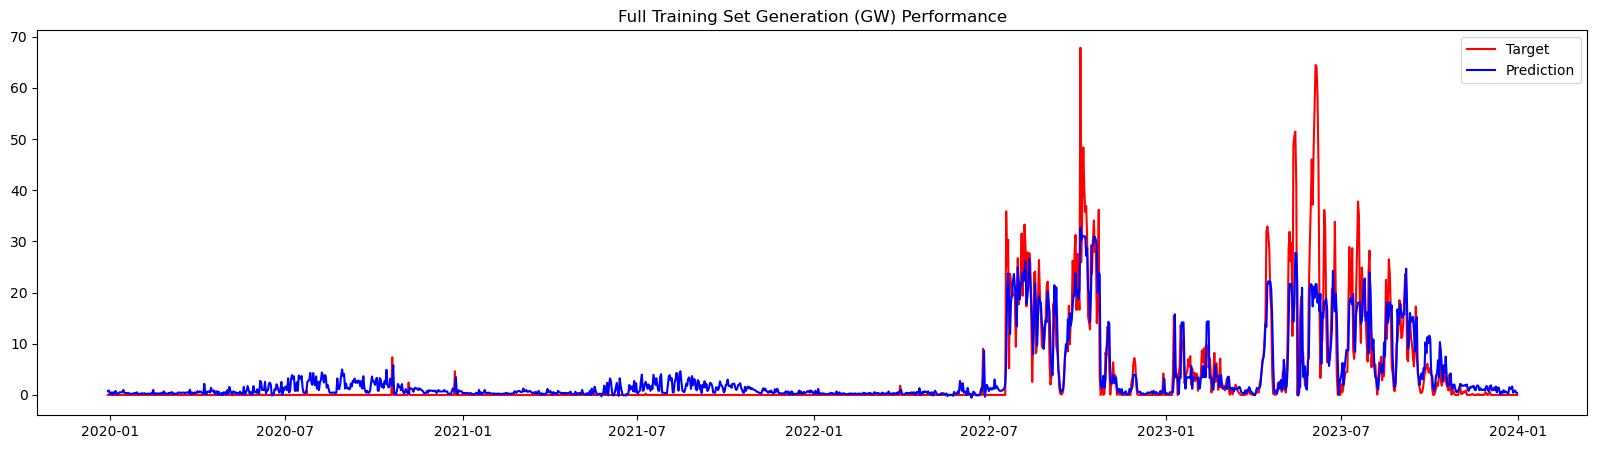

In [44]:
view_df = full_df.copy()
view_df["Pred"] = loadshed_model.predict(full_df[X_train.columns])
plt.figure(figsize=(20, 5))
plt.plot(view_df["Date"], view_df[target_col], color="red", label="Target")
plt.plot(view_df["Date"], view_df["Pred"], color="blue", label="Prediction")
plt.title("Full Training Set Generation (GW) Performance")
plt.legend()
plt.show()

## Final Model Training for Loadshed


In [47]:
X = full_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y = full_df["Loadshed"]
loadshed_data = lgb.Dataset(X, y)

In [50]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_boost_round": 300,
    "learning_rate": 1e-2,
    "num_leaves": 63,
    # 'max_depth': 2,
    "verbose": -1,
}

loadshed_model = lgb.train(
    params,
    loadshed_data,
    valid_sets=[loadshed_data],
    callbacks=[lgb.log_evaluation(period=100)],
)

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's rmse: 4.5175
[200]	training's rmse: 3.40399
[300]	training's rmse: 2.99742


In [51]:
loadshed_model.save_model("loadshed_lgbm_model.txt")